In [1]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.concat((
    pd.read_csv('./out/mabtree_rewards.csv', index_col=[0, 1]),
    pd.read_csv('./out/baseline_rewards.csv', index_col=[0, 1]),
))

df

reward     reward.1     reward.2  \
                    createdAt                                           
MABTree ε-greedy MF 2024-10-02    42.082086    38.848752    38.697381   
                    2024-10-03    70.374921    82.902919    87.601270   
                    2024-10-04   110.227778   104.983474   125.456270   
                    2024-10-05   142.762812   139.534268   157.862937   
                    2024-10-06   178.567885   171.306490   203.831502   
...                                     ...          ...          ...   
ε-greedy            2024-11-26  2119.122955  2148.394940  2148.246453   
                    2024-11-27  2161.707399  2192.694940  2184.862008   
                    2024-11-28  2218.384066  2249.839385  2240.930064   
                    2024-11-29  2265.542399  2294.813274  2282.488397   
                    2024-11-30  2300.234344  2333.869940  2319.098050   

                                   reward.3     reward.4     reward.5  \
                    createdAt                                           
MABTree ε-greedy MF 2024-10-02    50.973333    44.399955    34.889603   
                    2024-10-03    94.689405    85.389955    83.314325   
                    2024-10-04   130.379201   126.842177   129.351825   
                    2024-10-05   164.640034   166.625510   165.462103   
                    2024-10-06   203.522256   205.754121   196.109325   
...                                     ...          ...          ...   
ε-greedy            2024-11-26  2193.493160  2220.359081  2238.878501   
                    2024-11-27  2228.319549  2254.507692  2273.159335   
                    2024-11-28  2289.669549  2306.759908  2333.900446   
                    2024-11-29  2337.289538  2353.927686  2385.060446   
                    2024-11-30  2377.456204  2393.328797  2419.620446   

                                   reward.6     reward.7     reward.8  \
                    createdAt                                           
MABTree ε-greedy MF 2024-10-02    35.448859    49.003288    43.701451   
                    2024-10-03    75.528304    85.759955    83.559012   
                    2024-10-04   125.610865   122.065907   131.784907   
                    2024-10-05   156.445371   151.995544   161.608858   
                    2024-10-06   192.541359   182.225023   204.700525   
...                                     ...          ...          ...   
ε-greedy            2024-11-26  2296.118007  2272.708641  2269.087489   
                    2024-11-27  2331.238563  2310.124536  2307.242766   
                    2024-11-28  2385.035728  2371.191917  2363.386933   
                    2024-11-29  2436.743466  2430.171084  2409.960266   
                    2024-11-30  2472.210127  2468.272195  2449.061377   

                                   reward.9  
                    createdAt                
MABTree ε-greedy MF 2024-10-02    50.691954  
                    2024-10-03    91.398927  
                    2024-10-04   133.577538  
                    2024-10-05   164.949755  
                    2024-10-06   201.225668  
...                                     ...  
ε-greedy            2024-11-26  2242.908297  
                    2024-11-27  2279.779131  
                    2024-11-28  2345.732901  
                    2024-11-29  2392.799567  
                    2024-11-30  2429.491631  

[420 rows x 10 columns]

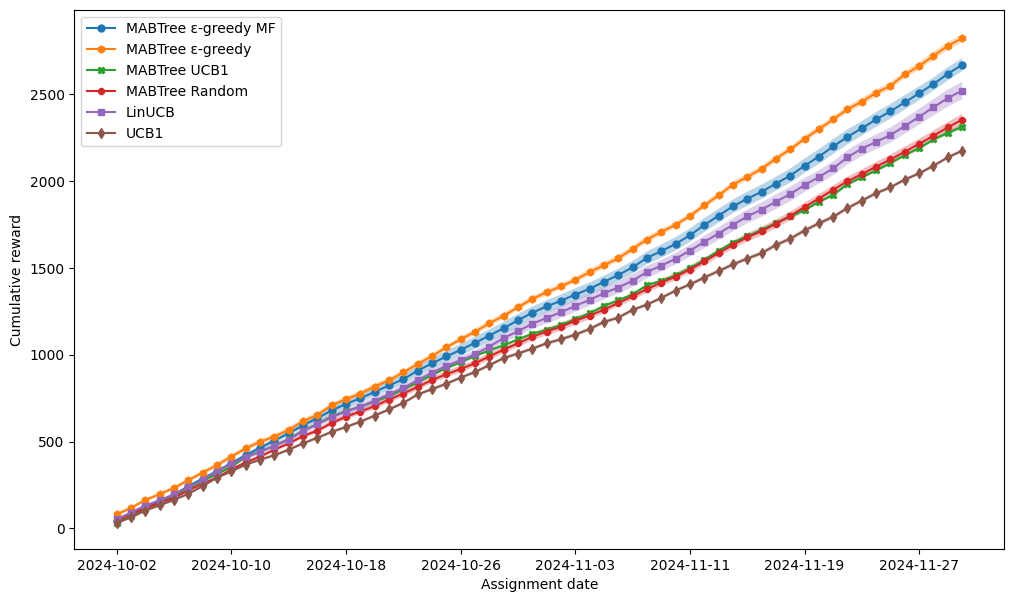

In [2]:
plt.figure(figsize=(12, 7))
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(10))
for marker, (name, group) in zip(['o', 'h', 'X', '8', 's', 'd'], df.groupby(level=0, sort=False)):
    m = group.mean(axis=1)
    s = group.std(axis=1)

    CI_min = m - 1.96 * s / group.shape[1] ** 0.5
    CI_max = m + 1.96 * s / group.shape[1] ** 0.5

    plt.plot(group.index.get_level_values(1), m, label=name, marker=marker, markersize=5)
    plt.fill_between(group.index.get_level_values(1), CI_min, CI_max, alpha=0.3)

#plt.title('Cumulative reward from 2024-10-01 to 2024-11-30')
plt.ylabel('Cumulative reward')
plt.xlabel('Assignment date')
plt.legend()
plt.savefig('./out/cumulative_reward.pdf', format='pdf', bbox_inches='tight')
plt.show()

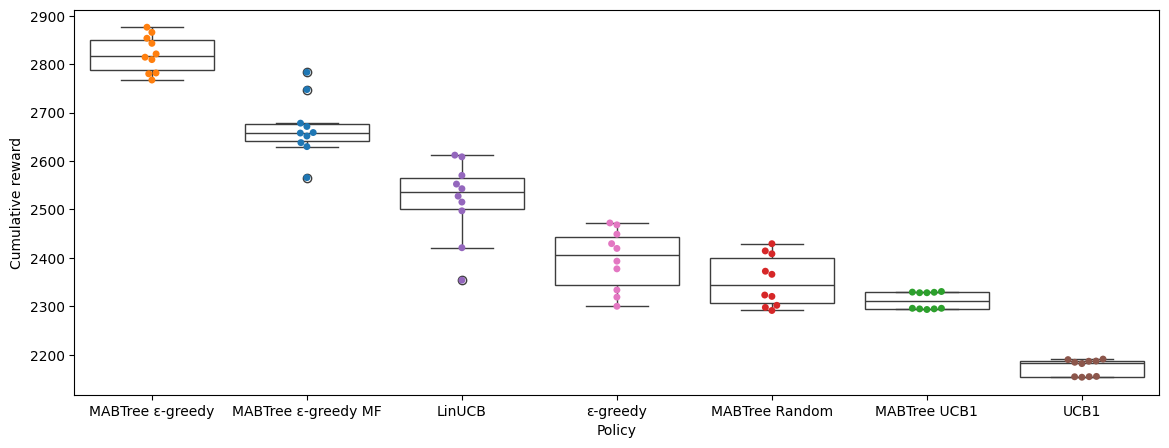

In [3]:
import seaborn as sns
lasted = df.groupby(level=0, sort=False).last().T
rank = lasted.median().sort_values(ascending=False).index

plt.figure(figsize=(14, 5))
sns.boxplot(data=lasted, color='white', order=rank)
sns.swarmplot(data=lasted)
#plt.title('Cumulated reward distribution at 2024-11-30')
plt.ylabel('Cumulative reward')
plt.xlabel('Policy')
plt.savefig('./out/cumulative_reward_2.pdf', format='pdf')
plt.show()

In [4]:
def highlight_max(s):
    d = s.sort_values(ascending=False)

    style = {
        d.index[0]: 'textbf:--rwrap ;',   # max
        d.index[1]: 'underline:--rwrap ;',  # second max
        d.index[-1]: 'textit:--rwrap ;',  # min
    }
    return [style.get(v, '') for v in s.index]


styled = lasted.reset_index(drop=True).T.assign(
    mean=lasted.mean(axis=0),
    std=lasted.std(axis=0),
).style.apply(highlight_max, axis=0).format('{:.3f}')

styled.format_index(escape='latex').to_latex(
    './out/cumulative_reward_table.tex',
    hrules=True,
    caption='Cumulated reward at 2024-11-30')

styled

,0,1,2,3,4,5,6,7,8,9,mean,std
MABTree ε-greedy MF,2638.022,2678.241,2671.409,2658.881,2783.382,2629.833,2651.617,2565.787,2747.553,2657.796,2668.252,60.568
MABTree ε-greedy,2767.298,2780.224,2781.845,2814.408,2853.489,2809.460,2865.736,2821.177,2876.287,2843.019,2821.294,37.791
MABTree UCB1,2294.839,2329.075,2296.042,2328.182,2294.792,2330.682,2293.542,2329.432,2296.042,2328.182,2312.081,17.977
MABTree Random,2297.886,2302.170,2372.569,2429.367,2414.472,2323.396,2366.173,2320.581,2291.524,2408.539,2352.668,52.259
LinUCB,2421.080,2353.974,2515.327,2570.349,2497.253,2542.907,2527.580,2552.481,2608.725,2612.217,2520.189,80.579
UCB1,2181.883,2191.169,2154.899,2187.171,2155.401,2186.738,2153.732,2190.075,2154.664,2184.571,2174.030,16.860
ε-greedy,2300.234,2333.870,2319.098,2377.456,2393.329,2419.620,2472.210,2468.272,2449.061,2429.492,2396.264,62.202
